In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.plotting_context(context='paper')
sns.set_palette('rainbow')

import pandas as pd
import prophet

In [67]:
sales = pd.read_csv('../../../data/mckinsey/sales.csv', index_col='ID')

skus = pd.read_csv('../../../data/mckinsey/sku.csv', index_col='SKU')

sales = sales.join(skus, on='SKU')

#### Clean dataset

In [68]:
sales.columns

Index(['geoCluster', 'SKU', 'date', 'price', 'sales', 'Category', 'Type',
       'brandId', 'lagerUnitQuantity', 'Units', 'trademark', 'countryOfOrigin',
       'Group'],
      dtype='object')

In [69]:
sales_raw = sales.copy()

sales['date'] = pd.to_datetime(sales['date'])
sales = sales.loc[sales['date'] > '2020-04-01']
sales['sales'] = sales['sales'].fillna(1)

In [70]:
timeframe_of_interest = pd.date_range(start=sales['date'].min(), end=sales['date'].max())

In [71]:
sales_time_series = sales.groupby('date')['sales'].sum().reindex(timeframe_of_interest, fill_value=0).reset_index()
sales_time_series.rename(columns={'index': 'ds', 'sales': 'y'}, inplace=True)

training_set = sales_time_series.iloc[:-60]
validation_set = sales_time_series.iloc[-60:]

<AxesSubplot:xlabel='ds'>

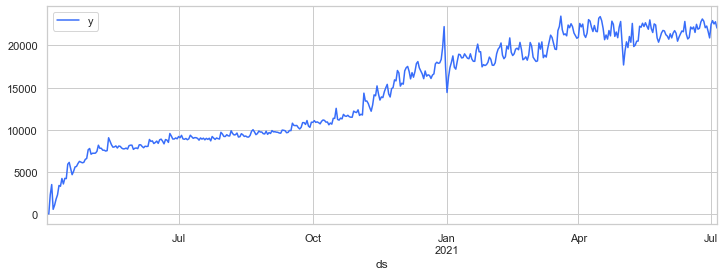

In [72]:
sales_time_series.plot(x='ds', y='y', figsize=(12, 4))

In [73]:
model = prophet.Prophet(yearly_seasonality=True).fit(training_set)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecasting\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [74]:
prediction_timeframe = pd.DataFrame({'ds': pd.date_range(sales_time_series['ds'].min(), sales_time_series['ds'].max())})

In [75]:
forecast = model.predict(prediction_timeframe)

C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecasting\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecasting\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


<AxesSubplot:xlabel='ds'>

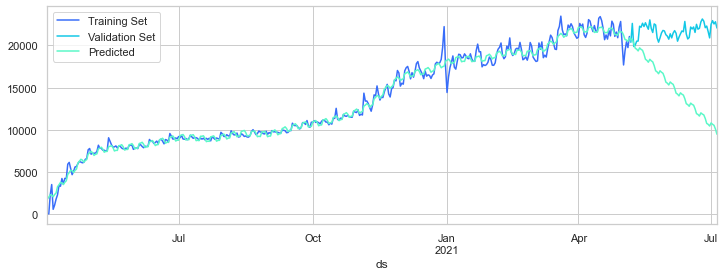

In [76]:
fig, ax = plt.subplots(figsize=(12, 4))

training_set.plot(ax=ax, x='ds', y='y', label='Training Set')
validation_set.plot(ax=ax, x='ds', y='y', label='Validation Set')
forecast.plot(ax=ax, x='ds', y='yhat', label='Predicted')